In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [16]:
a2 = lambda x: 1
a1 = lambda x: -2
a0 = lambda x: 1

dx, n = 1e-2, 300
# Cauchy boundary condition
# y = (1-1/6*x)*exp(x)
# y' = (5/6 - 1/6*x)*exp(x)
# y(0) = 1, y'(0) = 5/6
x_0, y_0, yp_0 = 0, 1, 5/6

In [17]:
def f(x, y, yp_prev):
    return dx/(a2(x) + a1(x)*dx) * (-a0(x)*y + a2(x) / dx * yp_prev)

In [18]:
F = np.zeros((n, 3))
F[0] = [x_0, y_0, yp_0]

for i in range(1, n):
    x, y, yp = F[i-1]
    v = f(x, y, yp)
    F[i] = [x + dx, y + dx * v, v]

In [34]:
F = np.zeros((n, 3))
F[0] = [x_0, y_0, yp_0]
for i in range(1, n):
    x, y, yp = F[i-1]
    k1 = f(x, y, yp)
    k2 = f(x + dx/2, y + k1*dx/2, yp)
    k3 = f(x + dx/2, y + k2*dx/2, yp)
    k4 = f(x + dx, y + k3*dx, yp)
    v = (k1 + 2 * k2 + 2 * k3 + k4) / 6
    yn = y + dx * v
    F[i] = [x + dx, yn, v]

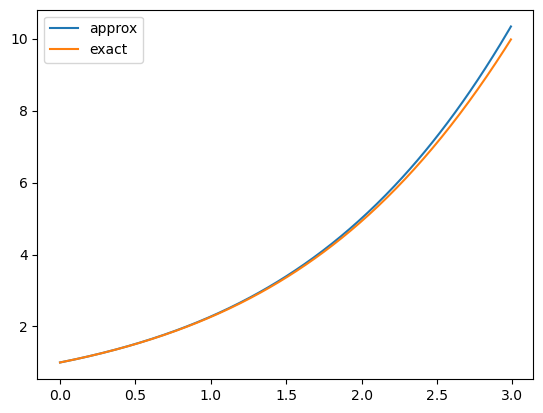

In [35]:
space = np.arange(x_0, dx * n, dx)
plt.plot(F[:, 0], F[:, 1], label='approx')
plt.plot(space, (1-1/6*space)*np.exp(space), label='exact')
plt.legend()
plt.show()